<a href="https://colab.research.google.com/github/roblux/My-masterpiece/blob/main/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd



## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()


,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,DATE,TAG,POSTS
2191,2021-10-01 00:00:00,delphi,142
2192,2021-10-01 00:00:00,go,697
2193,2021-10-01 00:00:00,java,6518
2194,2021-10-01 00:00:00,javascript,13719
2195,2021-10-01 00:00:00,perl,127


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [5]:
df.shape
# print(f"Rows: {df.shape[0]}")
# print(f"Columns: {df.shape[1]}")

(2196, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
print(df.count())

DATE     2196
TAG      2196
POSTS    2196
dtype: int64


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
df.groupby('TAG')['POSTS'].sum().sort_values(ascending=False)



,POSTS
TAG,
javascript,2240086
java,1771808
python,1746135
c#,1484027
php,1387136
c++,732204
r,409679
c,362956
swift,295719


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [8]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,159,159
c,159,159
c#,160,160
c++,159,159
delphi,159,159
go,144,144
java,159,159
javascript,159,159
perl,159,159


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [10]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [11]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [12]:
pivoted_df.shape

(2, 4)

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [13]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [14]:
reshaped_df.shape

(160, 14)

In [15]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [16]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1637.0,751.0,104.0,NaN,1121.0,629.0,128.0,472.0,533.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1982.0,804.0,112.0,NaN,1142.0,720.0,128.0,603.0,504.0,NaN,245.0,NaN
2008-11-01,16.0,257.0,1728.0,733.0,139.0,NaN,951.0,581.0,97.0,497.0,446.0,1.0,154.0,NaN


In [17]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2021-06-01,257.0,1859.0,5587.0,3798.0,125.0,606.0,7533.0,14888.0,154.0,4057.0,20738.0,4268.0,417.0,1776.0
2021-07-01,184.0,1605.0,5169.0,3465.0,140.0,601.0,6906.0,14658.0,138.0,3878.0,20434.0,4037.0,444.0,1949.0
2021-08-01,161.0,1522.0,5079.0,3225.0,133.0,739.0,6699.0,14511.0,118.0,3840.0,19699.0,4026.0,445.0,1878.0
2021-09-01,190.0,1697.0,5016.0,3571.0,133.0,615.0,6571.0,14315.0,112.0,3697.0,18879.0,3891.0,444.0,1611.0
2021-10-01,203.0,2085.0,5247.0,3686.0,142.0,697.0,6518.0,13719.0,127.0,NaN,NaN,NaN,NaN,NaN


In [18]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [19]:
reshaped_df.count()

,0
TAG,
assembly,159
c,159
c#,160
c++,159
delphi,159
go,144
java,159
javascript,159
perl,159


In [20]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1637.0,751.0,104.0,0.0,1121.0,629.0,128.0,472.0,533.0,6.0,285.0,0.0
2008-10-01,16.0,302.0,1982.0,804.0,112.0,0.0,1142.0,720.0,128.0,603.0,504.0,0.0,245.0,0.0
2008-11-01,16.0,257.0,1728.0,733.0,139.0,0.0,951.0,581.0,97.0,497.0,446.0,1.0,154.0,0.0


In [21]:
reshaped_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [22]:
import matplotlib.pyplot as plt

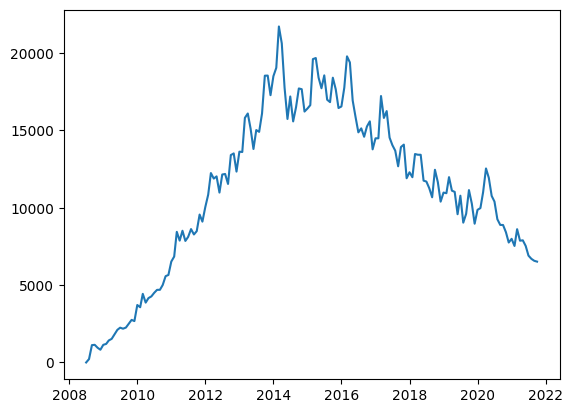

In [23]:
plt.plot(reshaped_df.index, reshaped_df['java'])


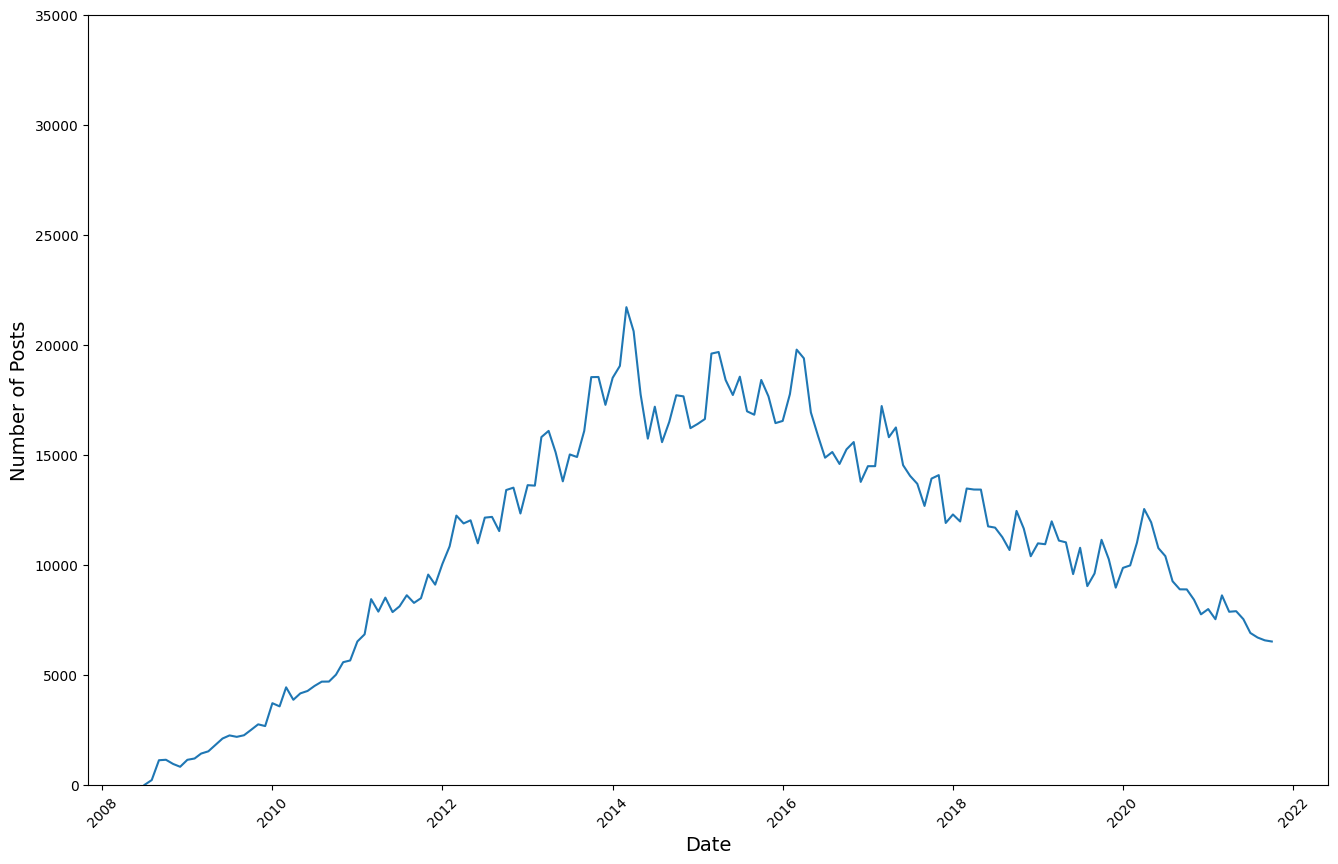

In [24]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.xticks(rotation=45)
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

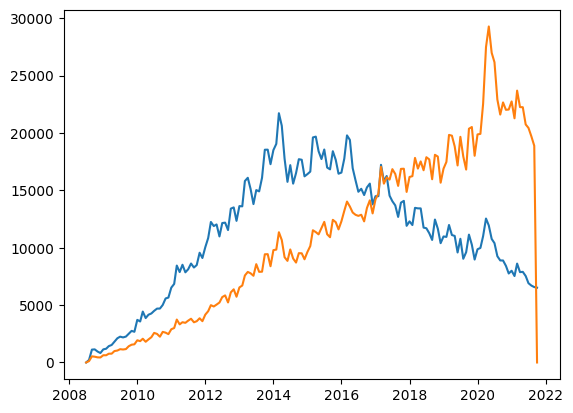

In [25]:
plt.plot(reshaped_df.index, reshaped_df['java'], reshaped_df['python'])

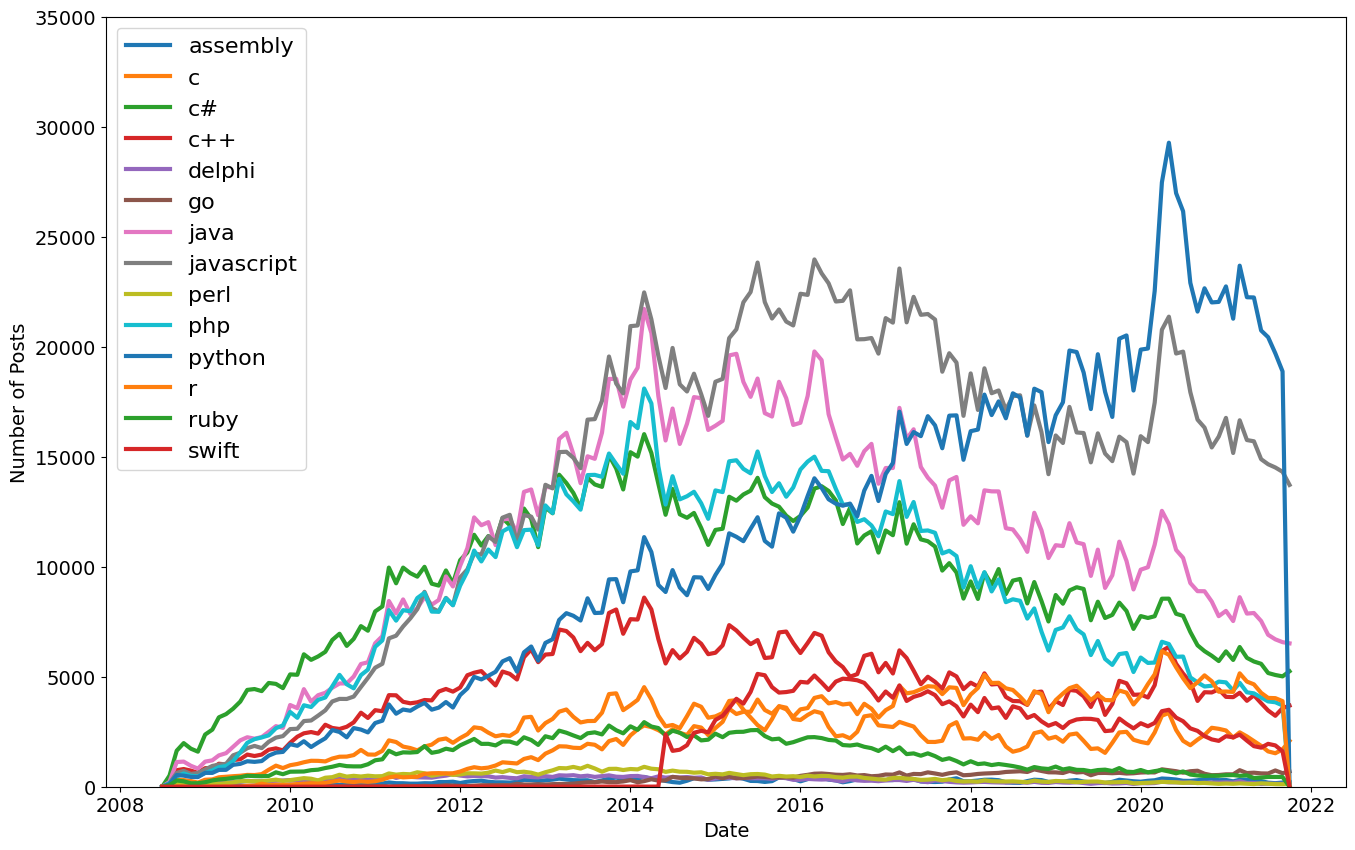

In [27]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

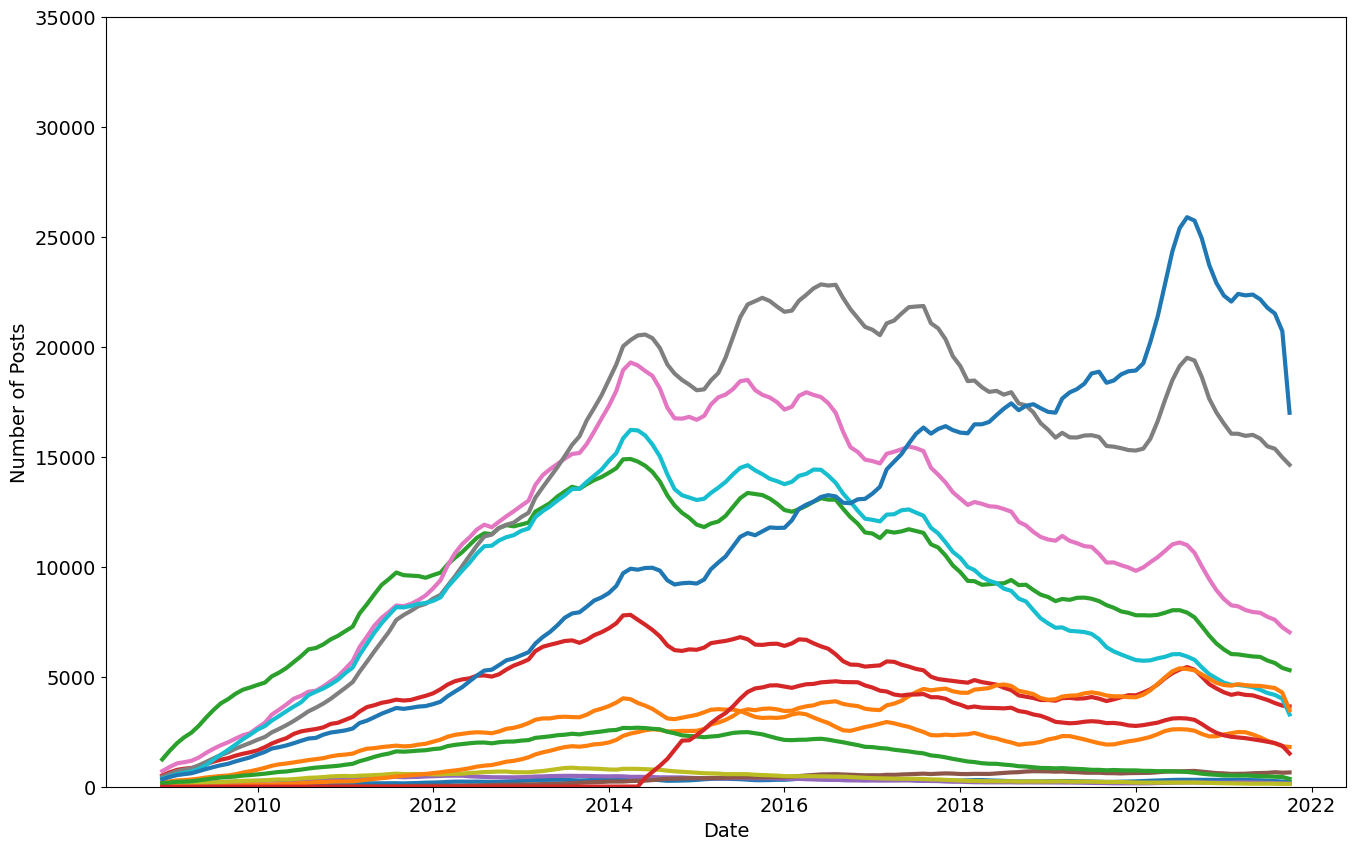

In [28]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

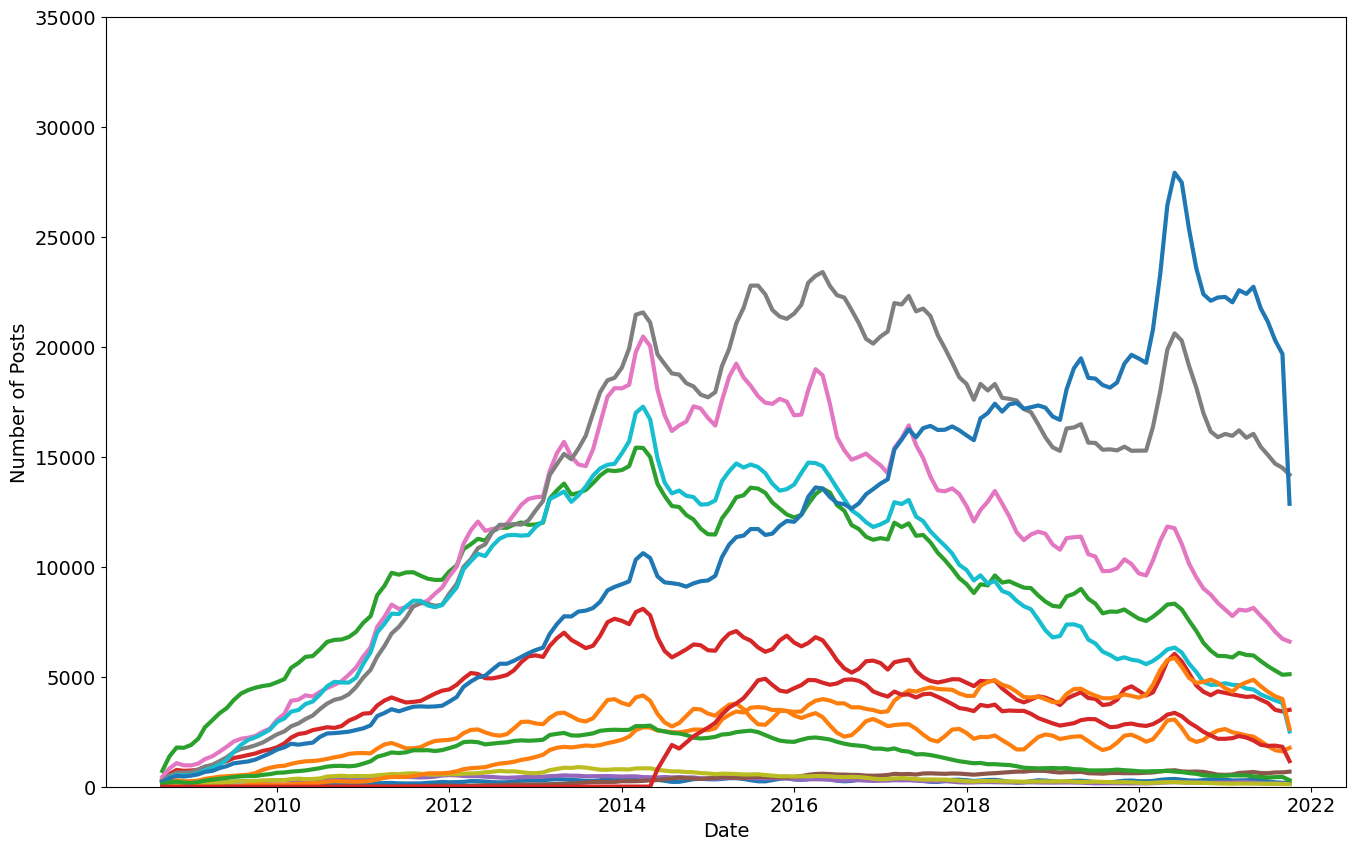

In [29]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

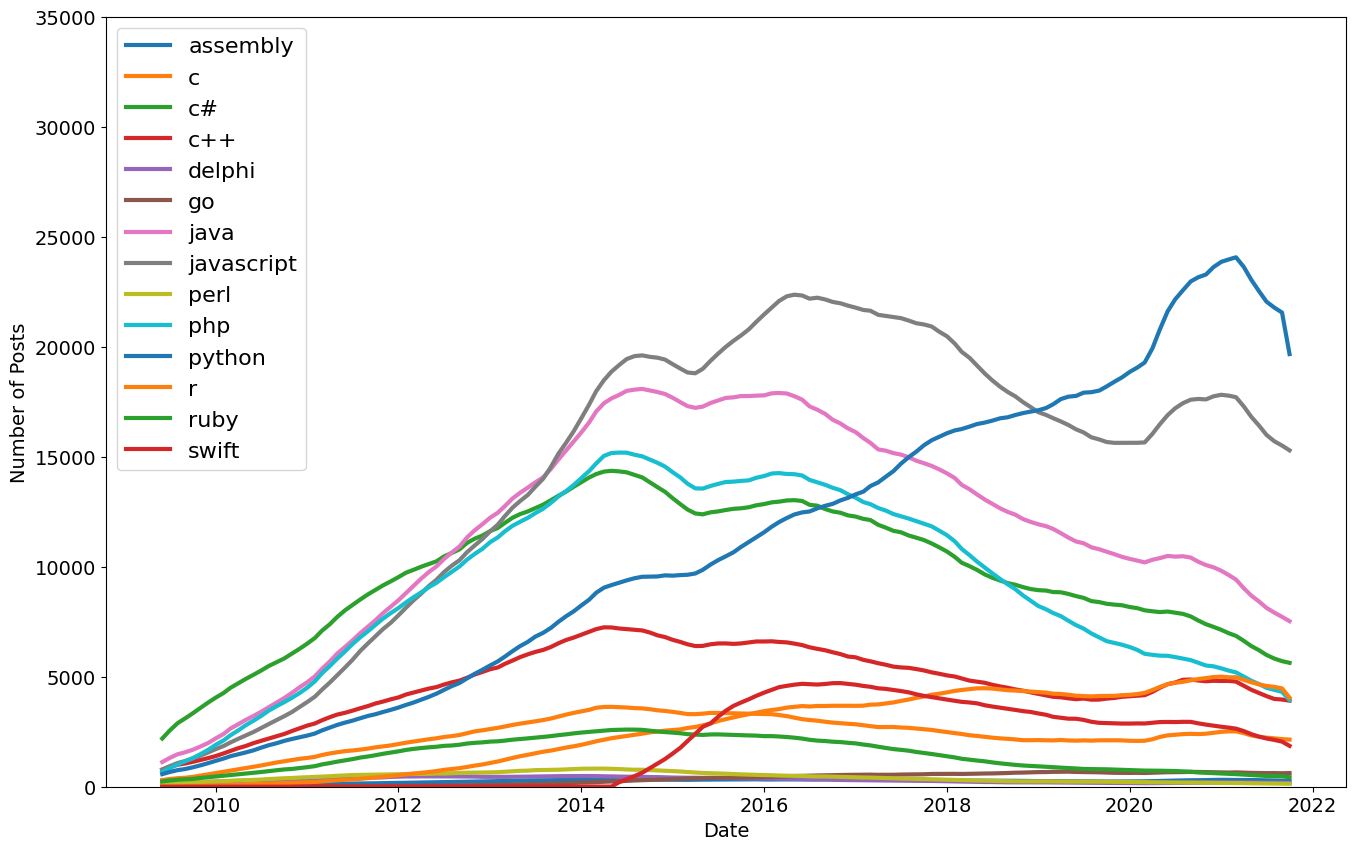

In [31]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)